In [2]:
import numpy as np
import matplotlib.pyplot as plt

Ok, so none of the simulation attempts have worked so far. I think what I'm gunna try to do is just implement the model that they said is the one that best reflects the biology, and not try to do all of it. I.e., a ring attractor model with "narrow local excitiation and flat long-range inhibition" (Kim et al. 4)

NB! in the paper they actually looked at only the Ring Attractor Global Model w/ Cosine connectivity, and the Ring Attractor Local Model (uniform inhibition with local excitation) (Kim et al. 1)

Both models were able to generate jump and flow responses depending on the stimulus shift (ibid.). But the jump-flow balance was different. Specifically, the local model's dynamics were more consistant with experimental results (Kim et al. 2).
1. Global model requires much stronger visual input to get bump jumps (ibid)
2. Global model requires much wider range of visual input strength to "explain jumps at multiple distances" (ibid)
3. Using empirical paramters, the observed jump-flow ratio could be reproduced with the local model, but not the global model. (ibid)
4. Laser power required to get a jump was "not [really] different between shift distances, favoring local model" (ibid)
5. Optogenetic input strength needed to "induce a jump was smaller than the global model's prediciton but matched the local model's prediciton" (ibid)
6. Intermediate models that had right kind of behavior "in response to a weak 22.5 degree wide input had a narrow connectivity profile" (Kim et al. 3), aligning with the local model. 


So, let's implement the local model

NB! Threshold linear -> max(0, input + 1)

NB! "branch of cosine" -> only a portion of the cosine curve used to describe the bump; activity out of this range set to 0. localized bump, where width is determined by periodicity of cosine and parameters of local connectivity. 

Dynamics of local model:
$$
\tau \frac{\partial f_n(t)}{\partial t} = -f_n(t) + \left[ \alpha f_n(t) + D \big( f_{n+1}(t) + f_{n-1}(t) - 2f_n(t) \big) - \beta \sum_{m=0}^{N-1} f_m(t) + I_n(t) \right]_+
$$

where $a$ is local recurrent excitation strength, $\Beta$ is global inhibition strength, $D$ is the diffusion coefficient (local coupling between neighbours), $I_n(t)$ is external input to neuron n and $[\cdot]_+$ is the 'threshold linear function'

In [ ]:
# Local model
num_neurons = 256 # their code
dt = 1.0e-3 # their code
tau = 1 # for simplicity
D = 0.1 #supmat pg 11
B = 20 #supmat pg 11
a = 3 #supmat pg 11
time_steps = 1000

activity = np.zeros(num_neurons)
external_input = np.zeros(num_neurons)

#integrate with Euler
inhibition = np.zeros(num_neurons)
connectivity = np.zeros(num_neurons)

for i in range(time_steps):
    inhibition = B * np.sum(activity + external_input)
    










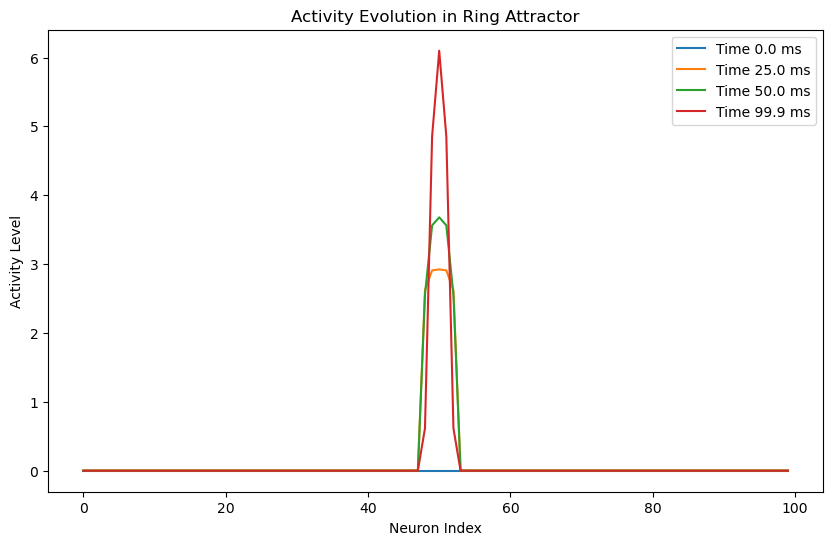

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 28 11:20:20 2024

@author: etabi
"""

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of neurons
tau = 20  # Time constant
alpha = 1.5  # Local excitation
beta = 0.5  # Global inhibition
D = 0.1  # Diffusion coefficient
dt = 0.1  # Time step
T = 100  # Total simulation time (ms)
steps = int(T / dt)

# Nonlinear activation function
def phi(I):
    return np.maximum(I + 1, 0)

# Connectivity kernel (local model)
def connectivity_matrix(N, alpha, beta, D):
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            d = min(abs(i - j), N - abs(i - j))  # Ring topology
            if d == 1:  # Nearest neighbors
                K[i, j] = D
            elif d == 0:  # Self-connection
                K[i, j] = alpha
        K[i, :] -= beta  # Global inhibition
    return K

# Initialize variables
f = np.zeros((steps, N))  # Activity levels
K = connectivity_matrix(N, alpha, beta, D)

# External input (localized bump)
I_ext = np.zeros(N)
I_ext[N // 2 - 2:N // 2 + 3] = 5  # Bump input at the center

# Simulation
for t in range(steps - 1):
    input_current = np.dot(K, f[t, :]) + I_ext
    f[t + 1, :] = f[t, :] + dt / tau * (-f[t, :] + phi(input_current))

# Plot results
time_points = [0, steps // 4, steps // 2, steps - 1]
plt.figure(figsize=(10, 6))
for t in time_points:
    plt.plot(f[t, :], label=f'Time {t * dt:.1f} ms')
plt.title("Activity Evolution in Ring Attractor")
plt.xlabel("Neuron Index")
plt.ylabel("Activity Level")
plt.legend()
plt.show()






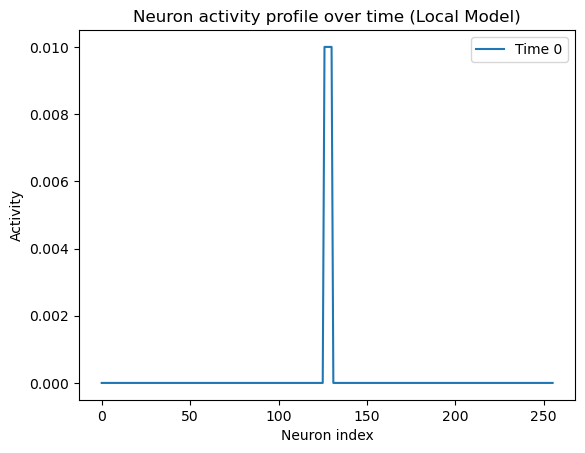

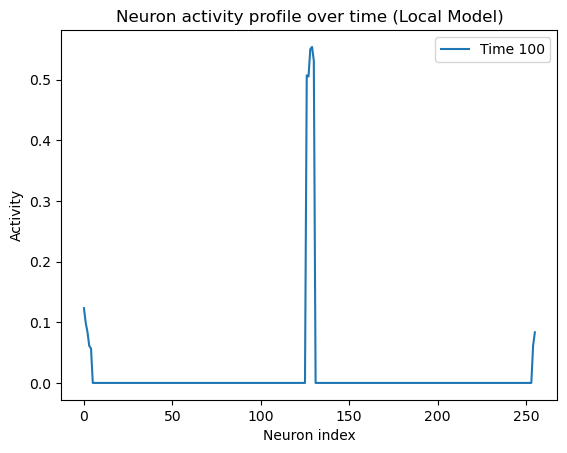

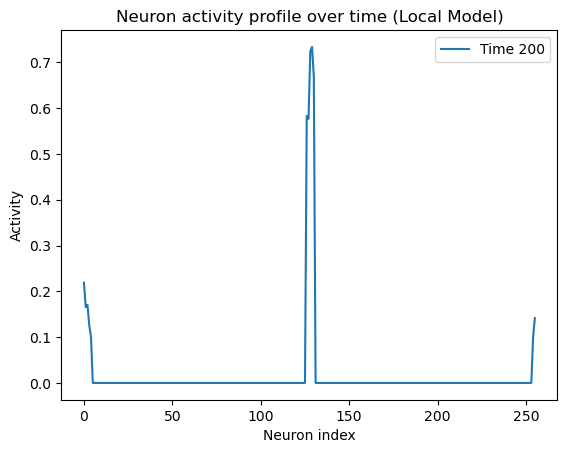

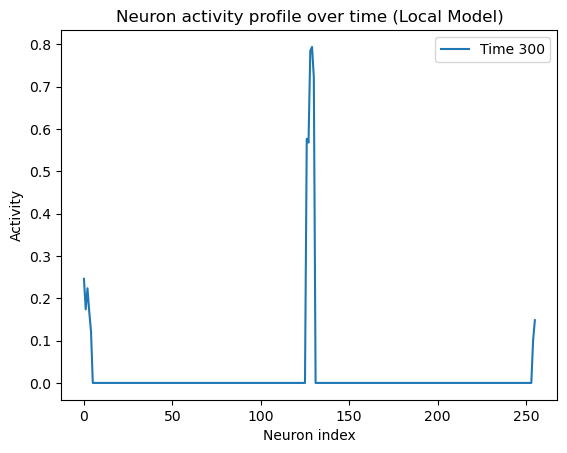

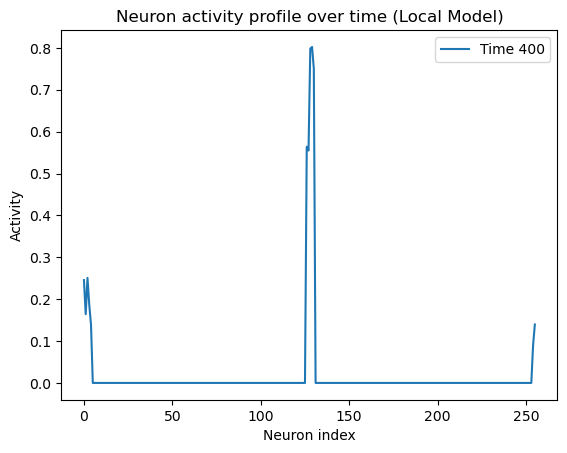

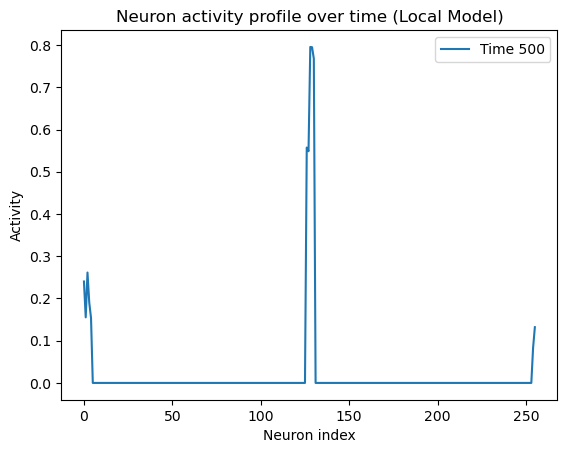

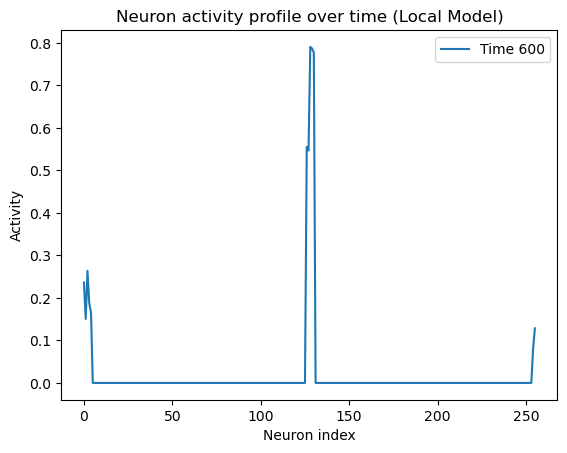

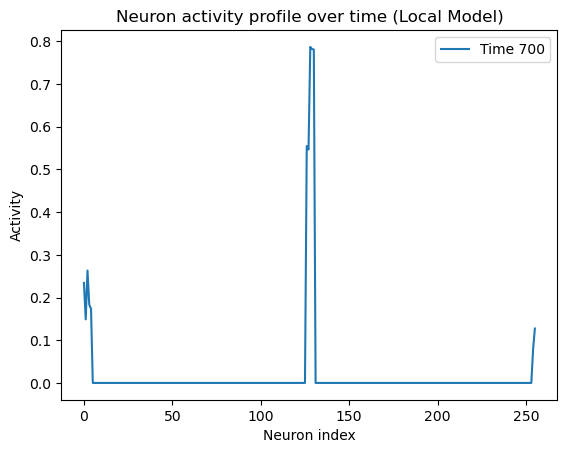

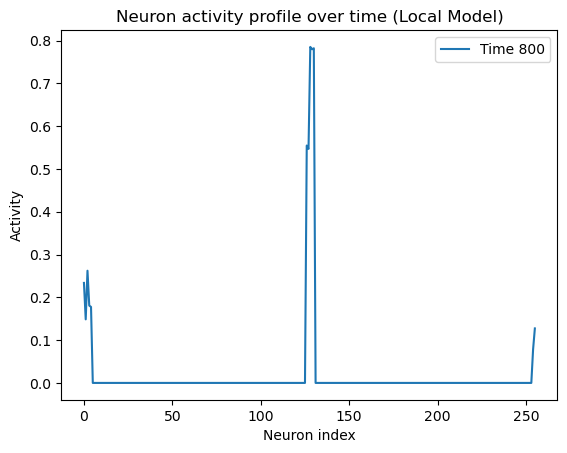

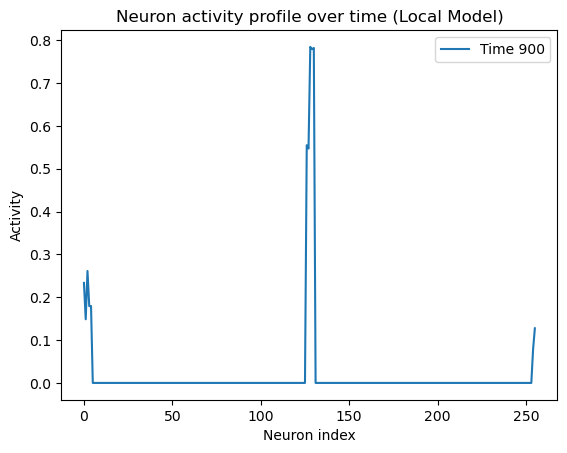

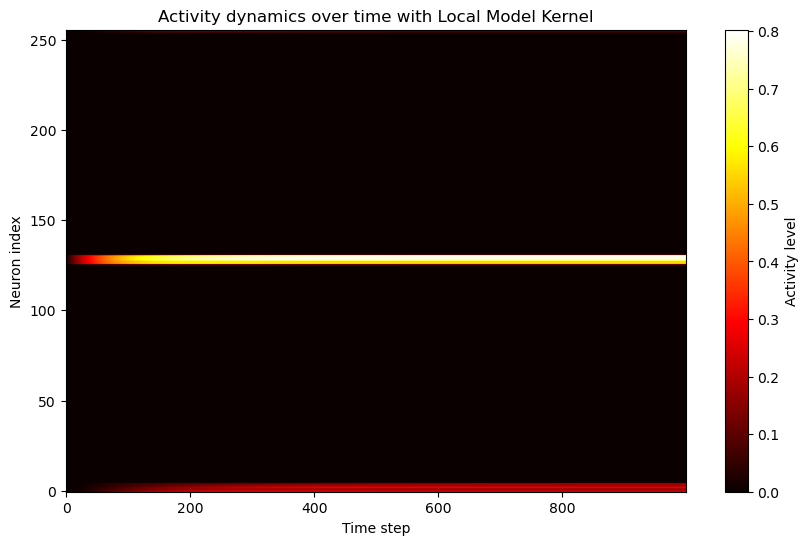

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 256              # Number of neurons in the ring
tau = 1.0            # Time constant
alpha = 0.8          # Strength of local excitation (nearest neighbors)
beta = 0.1           # Strength of global inhibition
dt = 0.01            # Time step
T = 1000             # Total number of simulation steps
I = np.zeros(N)
I[N // 2 - 2:N // 2 + 3] = 1      # External input in the middle (copied from Enrique)

# Initialize activity
f = np.random.rand(N) * 1.0e-10  # Small random activity for initialization

# Define the connectivity kernel
kernel = np.zeros(N)
kernel[1] = kernel[-1] = alpha  # Local excitation to nearest neighbors
kernel += -beta                 # Global inhibition (uniform for all neurons)

# Simulation storage
activity_over_time = []

# Simulation loop
for t in range(T):
    # Compute net input via circular convolution
    net_input = np.convolve(f, kernel, mode='same')  # Periodic convolution

    # Update neuron activity using the kernel
    new_f = f + (dt / tau) * (-f + np.maximum(0, net_input + I))

    # Update activity
    f = new_f
    activity_over_time.append(f.copy())

    # Optional: Plot activity every 100 steps
    if t % 100 == 0:
        plt.plot(f, label=f'Time {t}')
        plt.title("Neuron activity profile over time (Local Model)")
        plt.xlabel("Neuron index")
        plt.ylabel("Activity")
        plt.legend()
        plt.show()

# Convert activity over time to a heatmap
activity_over_time = np.array(activity_over_time)

# Plot the heatmap of activity dynamics
plt.figure(figsize=(10, 6))
plt.imshow(activity_over_time.T, aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label="Activity level")
plt.xlabel("Time step")
plt.ylabel("Neuron index")
plt.title("Activity dynamics over time with Local Model Kernel")
plt.show()

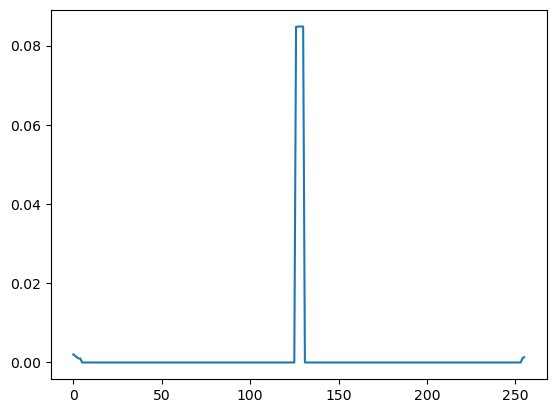

In [41]:
plt.plot(activity_over_time[8, :])